# Lead Score - Case Study

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## cleaning the data  

In [5]:
# placing "nan" inplace of "select"
data = data.replace('select',np.nan)

In [6]:
# all values to lower case
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
# unique values
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# deleting unique valued columns
data_1 = data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [9]:
# checking missing value percentage
round(100*(data_1.isnull().sum()/len(data_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
# removing columns with more than 35% null values
data_2 = data_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)

In [11]:
data_2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [12]:
# percentage of missing values
round(100*(data_2.isnull().sum()/len(data_2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<font color= blue>___There is a tremendous worth of null variables in 4 sections as seen previously. Yet, eliminating the lines with the null value will set us back a ton of information and they are significant segments. In this way, rather we will replace the "Nan" values with 'not provided'. This way we have every bit of the information and technically no null values. In the event that these come up in the model, it will be of no utilization and we can drop it off then, at that point.___</font>

In [13]:
data_2['Specialization'] = data_2['Specialization'].fillna('not provided') 
data_2['What matters most to you in choosing a course'] = data_2['What matters most to you in choosing a course'].fillna('not provided')
data_2['Country'] = data_2['Country'].fillna('not provided')
data_2['What is your current occupation'] = data_2['What is your current occupation'].fillna('not provided')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
# Rechecking the percentage of missing values
round(100*(data_2.isnull().sum()/len(data_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [15]:
data_2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
canada                     4
south africa               4
kuwait                     4
nigeria                    4
germany                    4
sweden                     3
ghana                      2
philippines                2
asia/pacific region        2
netherlands                2
bangladesh                 2
italy                      2
belgium                    2
china                      2
uganda                     2
liberia                    1
sri lanka                  1
malaysia                   1
denmark                    1
russia                     1
switzerland   

In [16]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

data_2['Country'] = data_2.apply(lambda x:slots(x['Country']), axis = 1)
data_2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [17]:
# Rechecking the percentage of missing values
round(100*(data_2.isnull().sum()/len(data_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [18]:
# Checking the percent of lose if the null values are removed
round(100*(sum(data_2.isnull().sum(axis=1) > 1)/data_2.shape[0]),2)

1.48

In [19]:
data_3 = data_2[data_2.isnull().sum(axis=1) <1]

In [20]:
# Code for checking number of rows left in percent
round(100*(data_3.shape[0])/(data.shape[0]),2)

98.2

In [21]:
# Rechecking the percentage of missing values
round(100*(data_3.isnull().sum()/len(data_3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [22]:
# To familiarize all the categorical values
for column in data_3:
    print(data_3[column].astype('category').value_counts())
    print('\n')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
539366d9-f633-455a-99e4-dbc5907db28e    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aaaaf89c-20bc-4974-8d0d-e31f1dc4f562    1
aab11d65-90a3-4f8a-98ac-58cfa19475ba    1
aab516e2-9881-4f4f-901a-cde597f7f9e9    1
aab6143a-424d-4a19-993e-03065412c420    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9074, dtype: int64


landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64


google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
press_release           2
social media            2
live chat       

In [23]:
# Removing Id values since they are unique for everyone
data_final = data_3.drop('Prospect ID',1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

## EDA

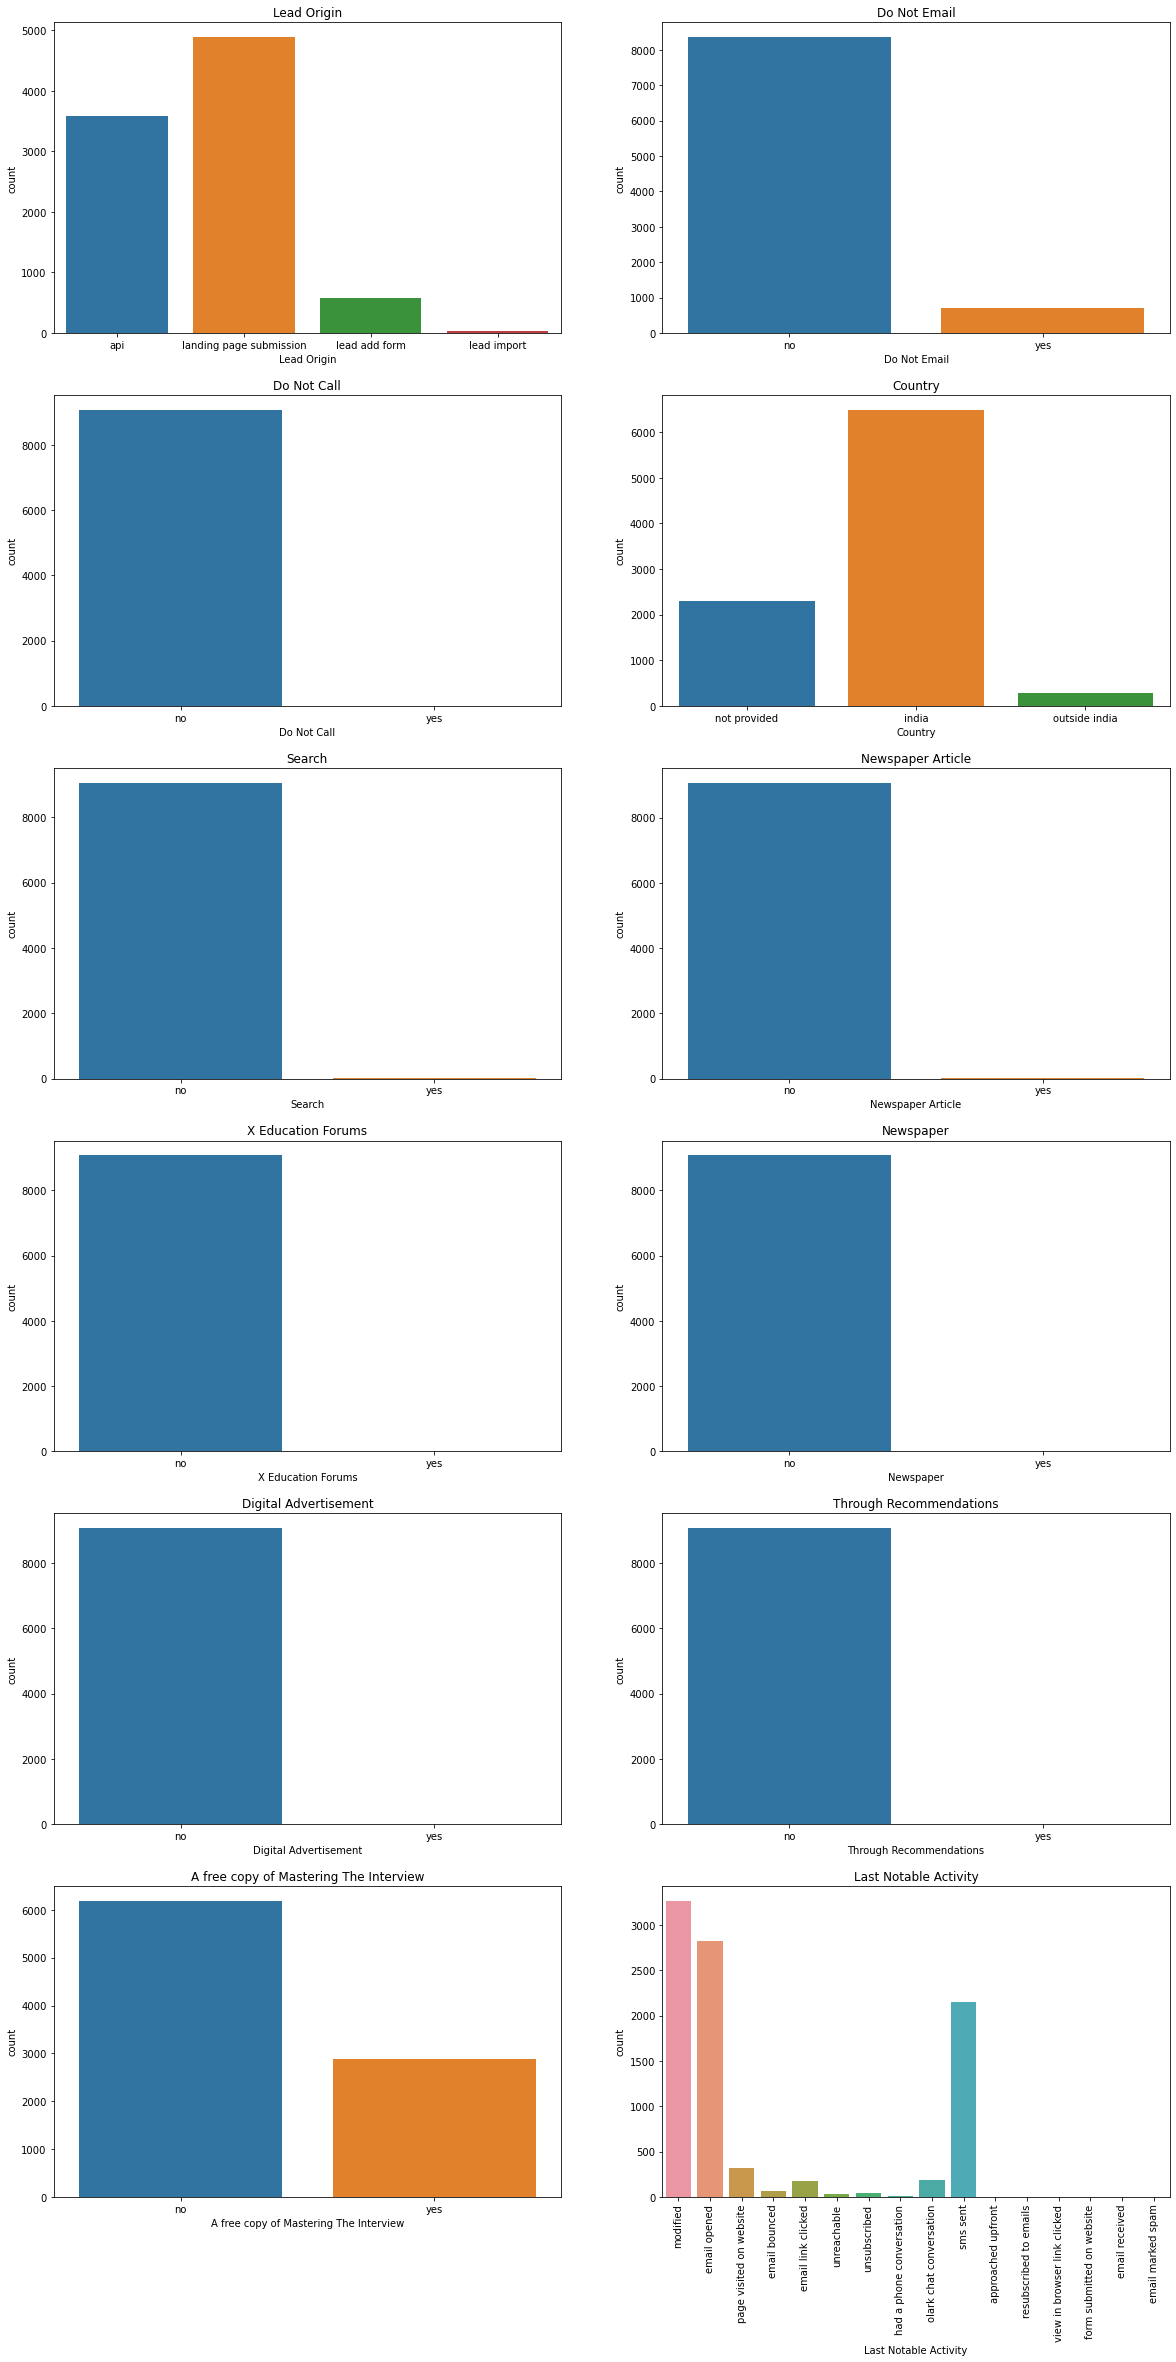

In [24]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(data_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(data_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(data_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(data_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(data_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(data_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(data_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(data_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(data_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(data_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(data_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(data_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

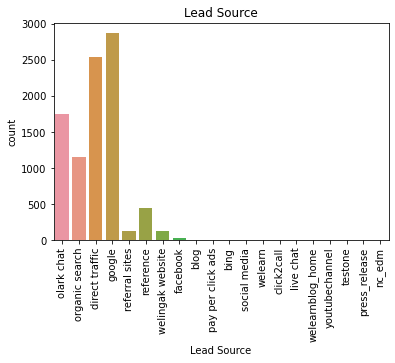

In [25]:
sns.countplot(data_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'What matters most to you in choosing a course')

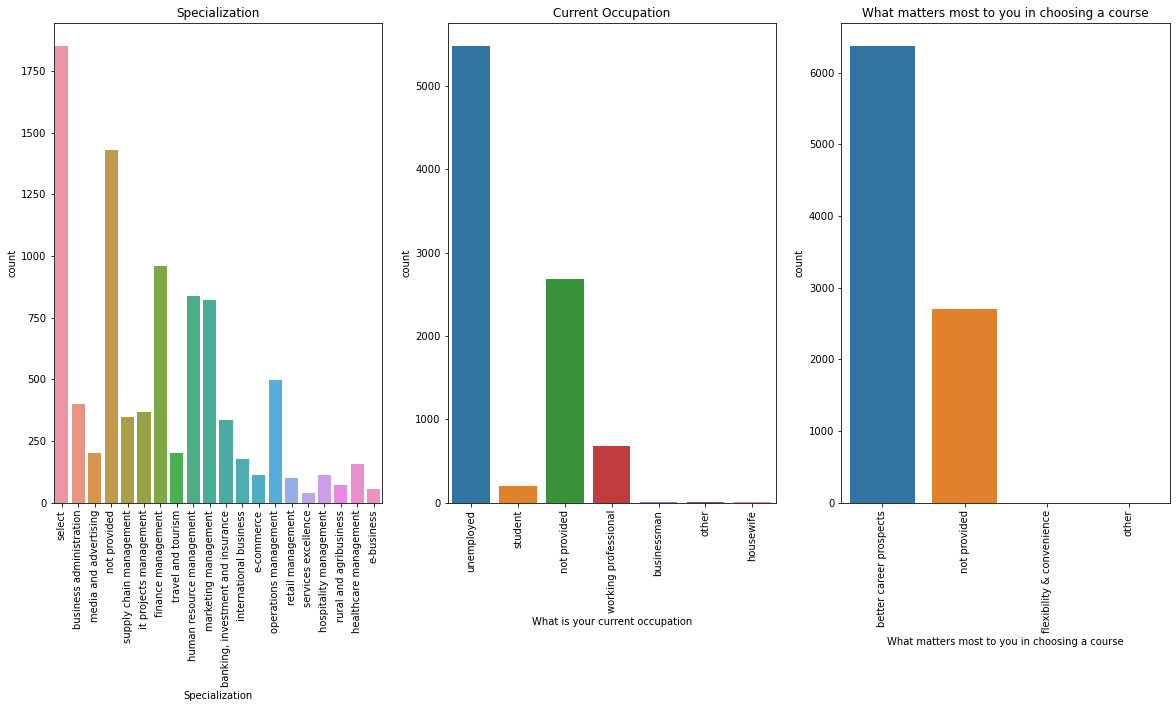

In [26]:
plt.figure(figsize = (20,30))
plt.subplot(3,3,1)
sns.countplot(data_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(3,3,2)
sns.countplot(data_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(3,3,3)
sns.countplot(data_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

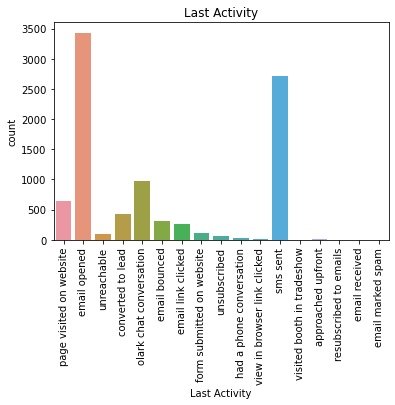

In [27]:
sns.countplot(data_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

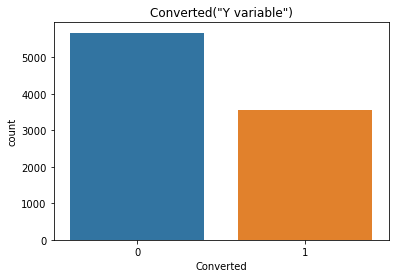

In [28]:
sns.countplot(data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

####  Numerical Variables

In [29]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

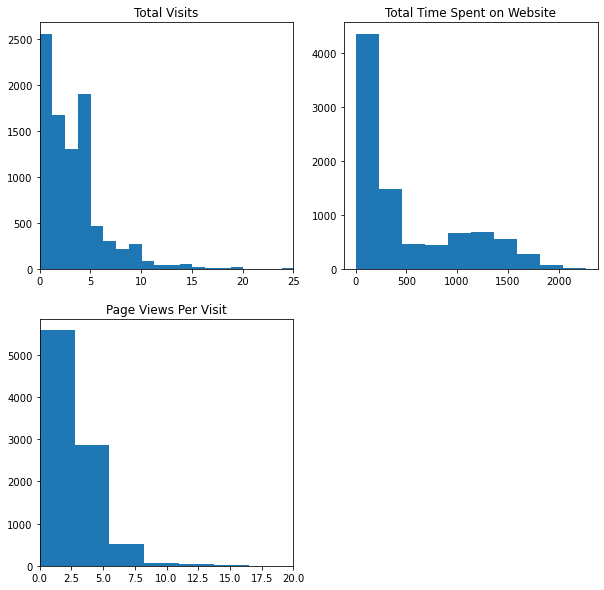

In [30]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(data_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

###  relating all the categorical variables for conversion

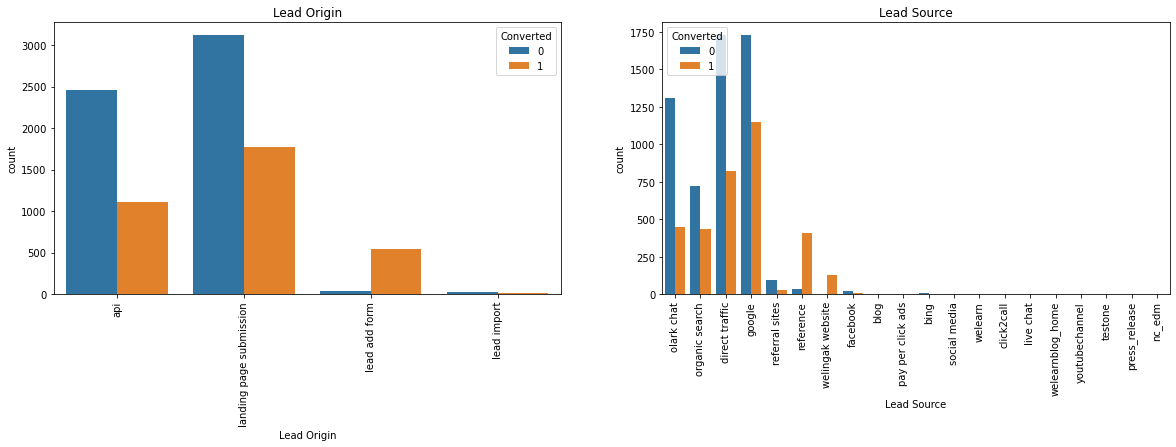

In [31]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data = data_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

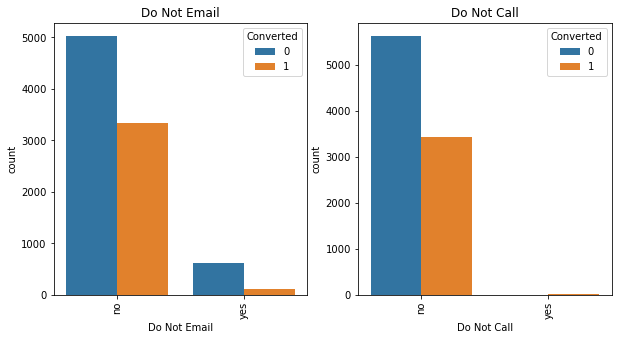

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

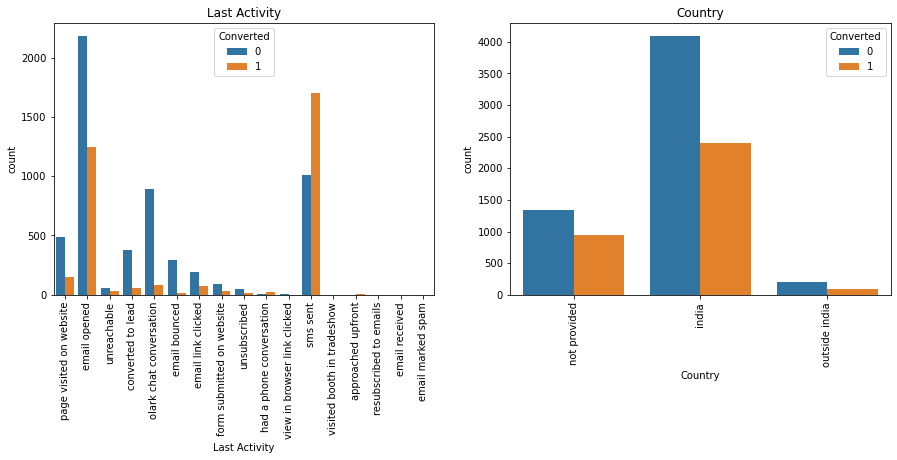

In [33]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

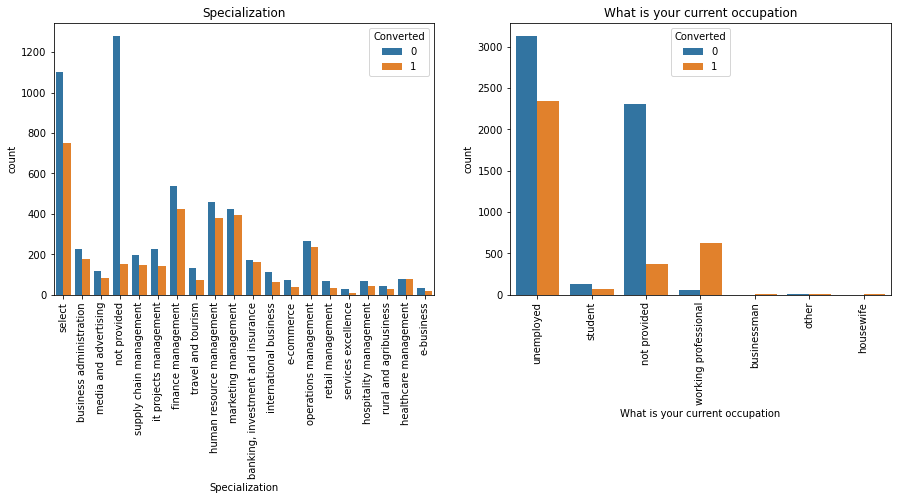

In [34]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

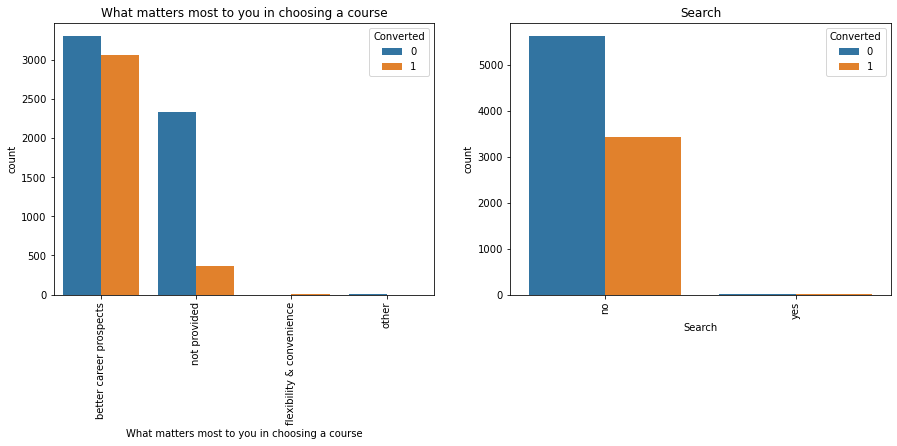

In [35]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

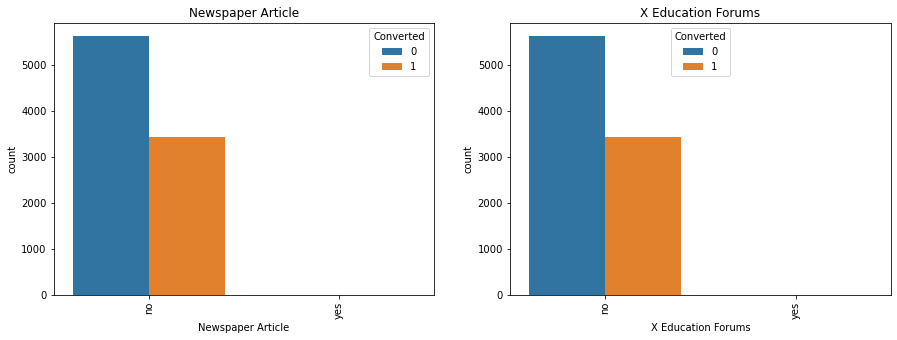

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

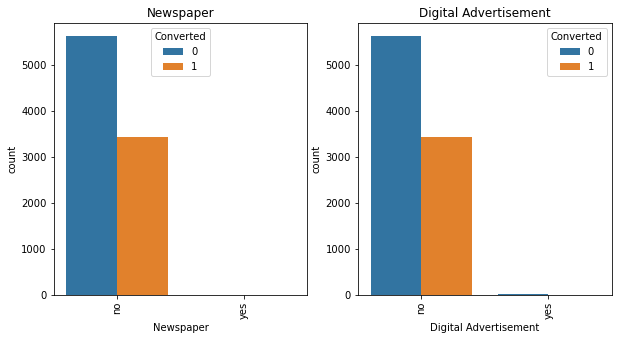

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

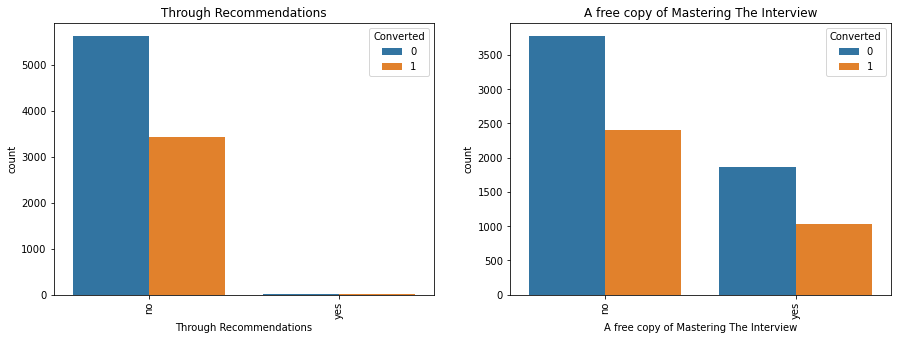

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

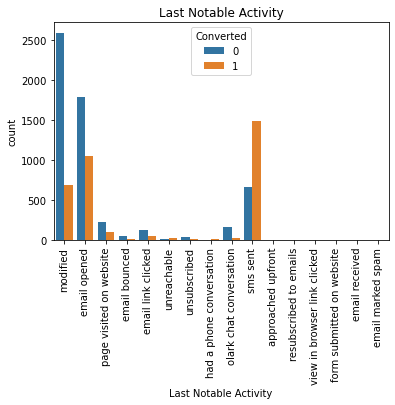

In [39]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

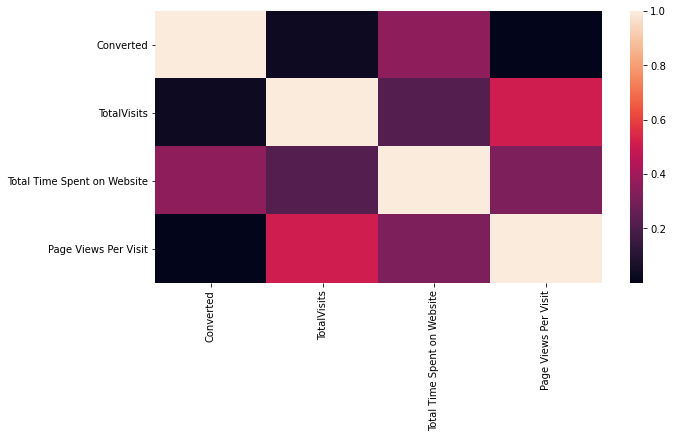

In [40]:
# Correlation
plt.figure(figsize=(10,5))
sns.heatmap(data_final.corr())
plt.show()

<font color= Blue>___It is justifiable from the above EDA that there are numerous components that have next to no information thus will be of less pertinence to our analysis.___</font>

In [41]:
num = data_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= Blue>___There aren't any significant outliers___</font>

## dummy Variables

In [42]:
data_final.loc[:, data_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
# creating dummy variables
dummies = pd.get_dummies(data_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
final_dummy = pd.concat([data_final, dummies], axis=1)
final_dummy.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [44]:
final_dummy = final_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
final_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## test-train split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = final_dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
# target 
y = final_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [49]:
from sklearn.preprocessing import MinMaxScaler
# scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


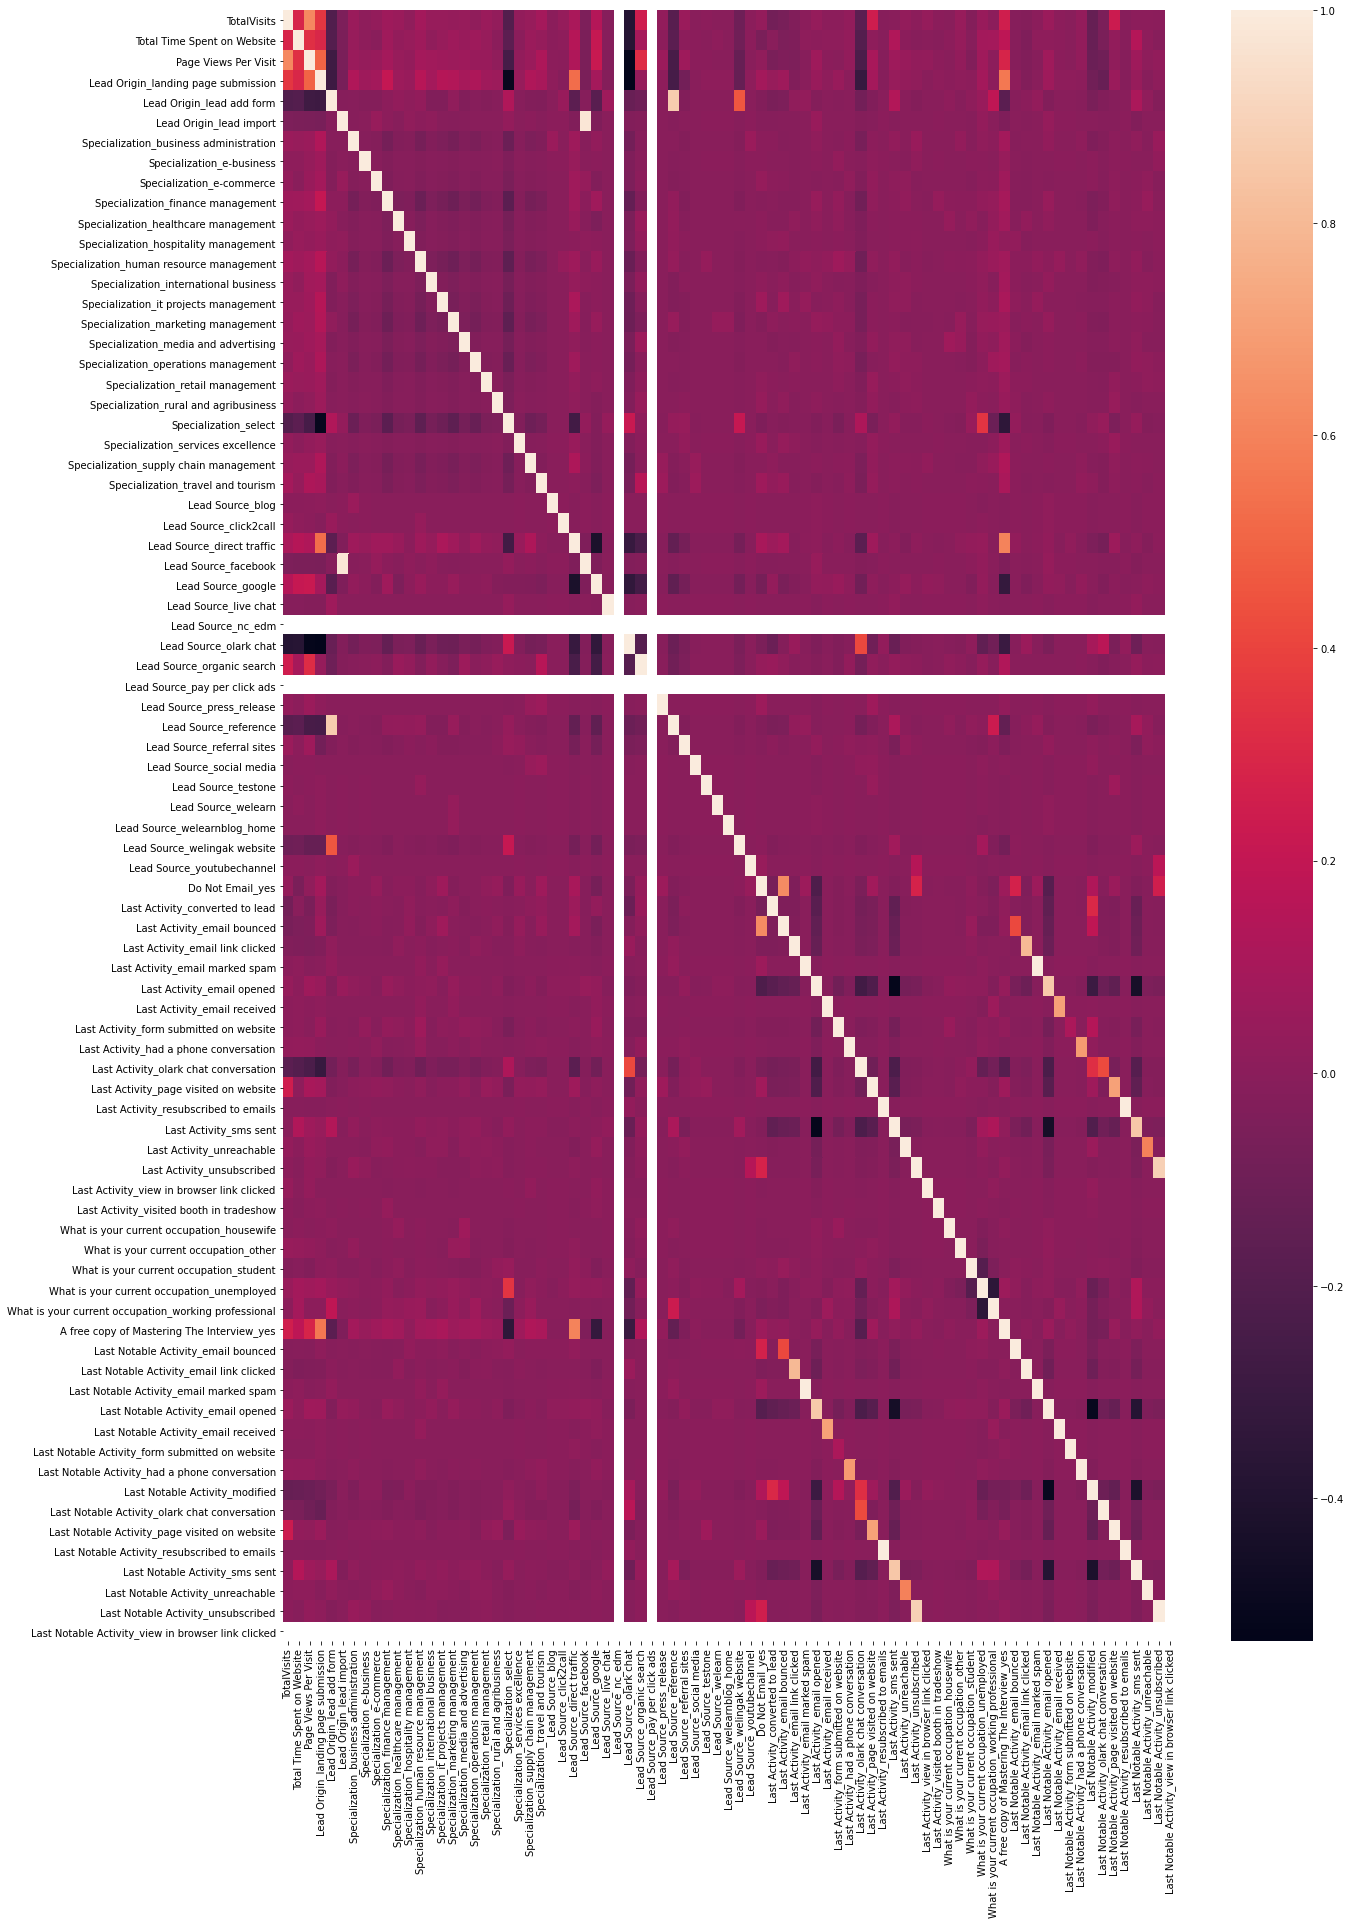

In [50]:
# correlation
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## model building 

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
# RFE
from sklearn.feature_selection import RFE

In [53]:
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 17),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 30),
 ('Specialization_business administration', False, 44),
 ('Specialization_e-business', False, 39),
 ('Specialization_e-commerce', False, 32),
 ('Specialization_finance management', False, 41),
 ('Specialization_healthcare management', False, 36),
 ('Specialization_hospitality management', False, 9),
 ('Specialization_human resource management', False, 42),
 ('Specialization_international business', False, 51),
 ('Specialization_it projects management', False, 38),
 ('Specialization_marketing management', False, 33),
 ('Specialization_media and advertising', False, 58),
 ('Specialization_operations management', False, 37),
 ('Specialization_retail management', False, 22),
 ('Specialization_rural and agribusiness', False, 34),
 ('Specialization_selec

In [55]:
# storing columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [56]:
# selecting columns selected by RFE
X_train = X_train[col]

In [57]:
import statsmodels.api as sm

In [58]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 21 Dec 2021   Deviance:                       5482.6
Time:                        02:44:57   Pearson chi2:                 6.64e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2524      0.081    -15.450      0.000      -1.411      -1.094
TotalVisits                                              4.5519      1.398      3.256      0.001       1.812       7.292
Total Time Spent on Website                              4.5660      0.162     28.101      0.000       4.248       4.884
Lead Origin_lead add form                                2.6773      0.225     11.916      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.979      0.000      -1.703      -1.256
Lead Source_google                                      -1.1705      0.109    -10.690      0.000      -1.385      -0.956
Lead Source_organic search                              -1.2823      0.134     -9.541      0.000      -1.546      -1.019
Lead Source_welingak website                             2.5984      1.033      2.515      0.012       0.573       4.624
Do Not Email_yes                                        -1.4076      0.168     -8.387      0.000      -1.737      -1.079
Last Activity_olark chat conversation                   -1.4678      0.165     -8.874      0.000      -1.792      -1.144
Last Activity_sms sent                                   1.3213      0.073     18.222      0.000       1.179       1.463
What is your current occupation_housewife               24.4759   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
What is your current occupation_other                    1.4134      0.760      1.859      0.063      -0.077       2.904
What is your current occupation_working professional     2.8071      0.193     14.509      0.000       2.428       3.186
Last Notable Activity_had a phone conversation          24.2053   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Last Notable Activity_unreachable                        1.7029      0.610      2.790      0.005       0.507       2.899
========================================================================================================================
"""

In [59]:
# import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# make a vif dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= blue>___the VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [61]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [62]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.9
Date:                Tue, 21 Dec 2021   Deviance:                       5499.7
Time:                        02:44:57   Pearson chi2:                 6.64e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2492      0.081    -15.422      0.000      -1.408      -1.090
TotalVisits                                              4.7231      1.410      3.349      0.001       1.959       7.488
Total Time Spent on Website                              4.5511      0.162     28.089      0.000       4.234       4.869
Lead Origin_lead add form                                2.6773      0.225     11.918      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.987      0.000      -1.703      -1.256
Lead Source_google                                      -1.1600      0.109    -10.611      0.000      -1.374      -0.946
Lead Source_organic search                              -1.2778      0.134     -9.510      0.000      -1.541      -1.014
Lead Source_welingak website                             2.5990      1.033      2.515      0.012       0.574       4.624
Do Not Email_yes                                        -1.4113      0.168     -8.413      0.000      -1.740      -1.083
Last Activity_olark chat conversation                   -1.4730      0.165     -8.908      0.000      -1.797      -1.149
Last Activity_sms sent                                   1.3132      0.072     18.136      0.000       1.171       1.455
What is your current occupation_housewife               22.4667   1.13e+04      0.002      0.998   -2.21e+04    2.21e+04
What is your current occupation_other                    1.4049      0.760      1.848      0.065      -0.085       2.895
What is your current occupation_working professional     2.8013      0.193     14.487      0.000       2.422       3.180
Last Notable Activity_unreachable                        1.6925      0.610      2.774      0.006       0.497       2.888
========================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= blue>___the VIF values seem fine but the p-values are still not. lets remove 'What is your current occupation housewife'___</font>

In [64]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [65]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.4
Date:                Tue, 21 Dec 2021   Deviance:                       5510.8
Time:                        02:44:58   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2461      0.081    -15.396      0.000      -1.405      -1.087
TotalVisits                                              4.6490      1.403      3.314      0.001       1.899       7.399
Total Time Spent on Website                              4.5480      0.162     28.098      0.000       4.231       4.865
Lead Origin_lead add form                                2.6841      0.224     11.957      0.000       2.244       3.124
Lead Source_direct traffic                              -1.4736      0.114    -12.954      0.000      -1.697      -1.251
Lead Source_google                                      -1.1551      0.109    -10.580      0.000      -1.369      -0.941
Lead Source_organic search                              -1.2633      0.134     -9.426      0.000      -1.526      -1.001
Lead Source_welingak website                             2.5921      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4146      0.168     -8.437      0.000      -1.743      -1.086
Last Activity_olark chat conversation                   -1.4765      0.165     -8.932      0.000      -1.800      -1.152
Last Activity_sms sent                                   1.3072      0.072     18.070      0.000       1.165       1.449
What is your current occupation_other                    1.4003      0.760      1.842      0.066      -0.090       2.890
What is your current occupation_working professional     2.7968      0.193     14.467      0.000       2.418       3.176
Last Notable Activity_unreachable                        1.6871      0.610      2.766      0.006       0.492       2.883
========================================================================================================================
"""

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= blue>___the VIF values seem fine but the p-values aren't again. So removing 'What is your current occupation other'___</font>

In [67]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [68]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.3
Date:                Tue, 21 Dec 2021   Deviance:                       5514.5
Time:                        02:44:58   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2466      0.081    -15.398      0.000      -1.405      -1.088
TotalVisits                                              4.7586      1.410      3.375      0.001       1.995       7.522
Total Time Spent on Website                              4.5539      0.162     28.136      0.000       4.237       4.871
Lead Origin_lead add form                                2.6860      0.224     11.966      0.000       2.246       3.126
Lead Source_direct traffic                              -1.4706      0.114    -12.929      0.000      -1.694      -1.248
Lead Source_google                                      -1.1564      0.109    -10.588      0.000      -1.370      -0.942
Lead Source_organic search                              -1.2631      0.134     -9.416      0.000      -1.526      -1.000
Lead Source_welingak website                             2.5923      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4186      0.168     -8.461      0.000      -1.747      -1.090
Last Activity_olark chat conversation                   -1.4717      0.165     -8.909      0.000      -1.796      -1.148
Last Activity_sms sent                                   1.3038      0.072     18.031      0.000       1.162       1.445
What is your current occupation_working professional     2.7934      0.193     14.449      0.000       2.414       3.172
Last Notable Activity_unreachable                        1.6837      0.610      2.761      0.006       0.488       2.879
========================================================================================================================
"""

In [69]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.33
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
10,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= blue>___all the VIF values are fine and all the p-values are less than 0.05.___</font>

## prediction

In [70]:
# predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.611739
3604    0.223294
5584    0.425011
7679    0.223294
7563    0.432202
7978    0.732762
7780    0.130274
7863    0.982565
838     0.779231
708     0.132990
dtype: float64

In [71]:
# reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61173868, 0.22329356, 0.42501069, 0.22329356, 0.43220183,
       0.73276232, 0.13027447, 0.9825646 , 0.77923117, 0.13298976])

In [72]:
# convertion rate and probablity of predicted ones
y_train_pred_1 = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_1.head()

,Converted,Conversion_Prob
0,1,0.611739
1,0,0.223294
2,0,0.425011
3,0,0.223294
4,0,0.432202


In [73]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_1['Predicted'] = y_train_pred_1.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_1.head()

,Converted,Conversion_Prob,Predicted
0,1,0.611739,1
1,0,0.223294,0
2,0,0.425011,0
3,0,0.223294,0
4,0,0.432202,0


## model evaluation

In [74]:
from sklearn import metrics

In [75]:
# confusion matrix 
conf = metrics.confusion_matrix(y_train_pred_1.Converted, y_train_pred_1.Predicted )
conf

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [76]:
# accuracy
metrics.accuracy_score(y_train_pred_1.Converted, y_train_pred_1.Predicted)

0.807746811525744

In [77]:
# Substituting the value of true positive
TP = conf[1,1]
# Substituting the value of true negatives
TN = conf[0,0]
# Substituting the value of false positives
FP = conf[0,1] 
# Substituting the value of false negatives
FN = conf[1,0]

In [78]:
# sensitivity
TP/(TP+FN)

0.7031758957654723

In [79]:
# specificity
TN/(TN+FP)

0.8736842105263158

<font color= blue>___0.5 as cutoff, we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## ROC Curve

#### Optimum cut off

In [80]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_1.Converted, y_train_pred_1.Conversion_Prob, drop_intermediate = False )

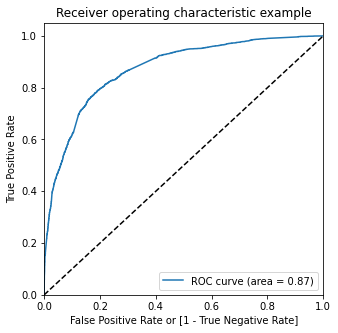

In [82]:
# ROC function
draw_roc(y_train_pred_1.Converted, y_train_pred_1.Conversion_Prob)

<font color= blue>___the area under ROC curve is 0.87 .___</font>

In [83]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_1[i]= y_train_pred_1.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_1.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0


In [84]:
# dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_1.Converted, y_train_pred_1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_data

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.572508,0.972720,0.320154
0.2,0.2,0.717840,0.923453,0.588190
0.3,0.3,0.783341,0.829397,0.754300
0.4,0.4,0.805228,0.765879,0.830039
0.5,0.5,0.807747,0.703176,0.873684
0.6,0.6,0.784758,0.569625,0.920411
0.7,0.7,0.769643,0.495114,0.942747
0.8,0.8,0.749961,0.400651,0.970218
0.9,0.9,0.700205,0.243485,0.988190


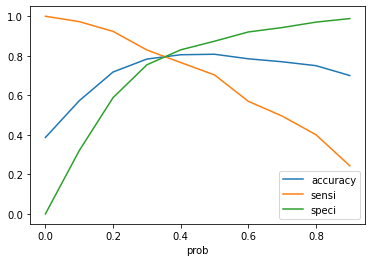

In [85]:
# plotting 
cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= blue>___optimal cut off is at 0.35.___</font>

In [86]:
y_train_pred_1['final_predicted'] = y_train_pred_1.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_1.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [87]:
# accuracy
metrics.accuracy_score(y_train_pred_1.Converted, y_train_pred_1.final_predicted)

0.7967249252086286

In [88]:
# confusion matrix 
conf2 = metrics.confusion_matrix(y_train_pred_1.Converted, y_train_pred_1.final_predicted )
conf2

array([[3097,  798],
       [ 493, 1963]], dtype=int64)

In [89]:
# substituting the value of true positive
TP = conf2[1,1]
# substituting the value of true negatives
TN = conf2[0,0]
# substituting the value of false positives
FP = conf2[0,1] 
# substituting the value of false negatives
FN = conf2[1,0]

In [90]:
#sensitivity
TP/(TP+FN)

0.7992671009771987

In [91]:
#specificity
TN/(TN+FP)

0.7951219512195122

<font color= blue>___current cut off = 0.35 where as accuracy, sensitivity and specificity of around 80%.___</font>

## prediction on Test set

In [92]:
# scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
# substituting all the columns in the final train model
cols = X_train.columns

In [94]:
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,1,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0,0,0,1,0,0,0,1,1,0
2085,1.0,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0
4048,1.0,0.028369,0.617077,0,1,0,0,0,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0
8179,1.0,0.170213,0.148768,0,0,1,0,0,0,0,1,0,0
6236,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,1,0,0,0,0,1,0,0


In [95]:
#storing prediction
y_test_pred = res.predict(X_test_sm)
# coverting it to dataframe
y_pred_data = pd.DataFrame(y_test_pred)
# y_test dataframe
y_test_data = pd.DataFrame(y_test)
# remove index for both dataframes to append them side by side 
y_pred_data.reset_index(drop=True, inplace=True)
y_test_data.reset_index(drop=True, inplace=True)
# append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_data, y_pred_data],axis=1)
# renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [96]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
...,...,...,...
2718,1,0.061901,0
2719,0,0.595864,1
2720,0,0.223294,0
2721,1,0.795858,1


In [97]:
#accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8005875872199779

In [98]:
# confusion matrix 
conf2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf2

array([[1394,  350],
       [ 193,  786]], dtype=int64)

In [99]:
# true positive
TP = conf2[1,1]
# true negatives
TN = conf2[0,0]
# false positives
FP = conf2[0,1] 
# false negatives
FN = conf2[1,0]

In [100]:
# sensitivity
TP/(TP+FN)

0.8028600612870276

In [101]:
# specificity
TN/(TN+FP)

0.7993119266055045

<font color= blue>___current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## precision-recall

In [102]:
conf3 = metrics.confusion_matrix(y_train_pred_1.Converted, y_train_pred_1.final_predicted )
conf3

array([[3097,  798],
       [ 493, 1963]], dtype=int64)

In [103]:
# precision
conf3[1,1]/(conf3[0,1]+conf3[1,1])

0.710974284679464

In [104]:
#recall
conf3[1,1]/(conf3[1,0]+conf3[1,1])

0.7992671009771987

<font color= blue>___the current cut off is 0.35 and Precision is around 71% and Recall is around 79%___</font>

### precision and recall tradeoff

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_1.Converted, y_train_pred_1.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_1.Converted, y_train_pred_1.Conversion_Prob)

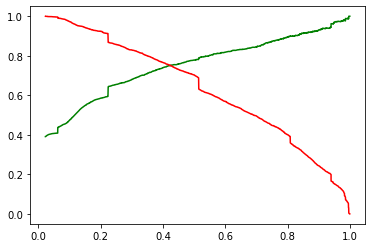

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [109]:
y_train_pred_1['final_predicted'] = y_train_pred_1.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_1.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [110]:
# accuracy
metrics.accuracy_score(y_train_pred_1.Converted, y_train_pred_1.final_predicted)

0.8060148008187688

In [111]:
# confusion matrix
conf_2 = metrics.confusion_matrix(y_train_pred_1.Converted, y_train_pred_1.final_predicted )
conf_2

array([[3256,  639],
       [ 593, 1863]], dtype=int64)

In [112]:
#true positive
TP = conf_2[1,1]
#true negatives
TN = conf_2[0,0]
#false positives
FP = conf_2[0,1] 
#false negatives
FN = conf_2[1,0]

In [113]:
# precision
TP / (TP + FP)

0.7446043165467626

In [114]:
#recall
TP / (TP + FN)

0.7585504885993485

<font color= blue>___the current cut off is 0.41 and Precision around 74% and Recall around 76%___</font>

### prediction on test set

In [115]:
# storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# coverting it to dataframe
y_pred_data = pd.DataFrame(y_test_pred)
# converting y_test to dataframe
y_test_data = pd.DataFrame(y_test)
# removing index for both dataframes to append them
y_pred_data.reset_index(drop=True, inplace=True)
y_test_data.reset_index(drop=True, inplace=True)
# append y_test_data and y_pred_data
y_pred_final = pd.concat([y_test_data, y_pred_data],axis=1)
# renaming column 
y_pred_final = y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [116]:
# prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
...,...,...,...
2718,1,0.061901,0
2719,0,0.595864,1
2720,0,0.223294,0
2721,1,0.795858,1


In [117]:
# accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.808666911494675

In [118]:
# confusion matrix 
conf2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf2

array([[1465,  279],
       [ 242,  737]], dtype=int64)

In [119]:
# true positive
TP = conf2[1,1]
# true negatives
TN = conf2[0,0]
# false positives
FP = conf2[0,1] 
# false negatives
FN = conf2[1,0]

In [120]:
# precision
TP / (TP + FP)

0.7253937007874016

In [121]:
#recall
TP / (TP + FN)

0.7528089887640449

<font color= blue>___the current cut off is 0.41,precision around 73% and recall around 75%___</font>

## <font color= blue>conclusion</font>
It was observed that the factors that made a difference in the potential purchasers are(In descending order) :
1.	The absolute time spent on the Website.
2.	Total number of visits.
3.	At the point when the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
keeping these in mind the X Education can prosper as they have an extremely high opportunity to get practically every possible customer by altering their perspective and purchase their courses.